In [145]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer, roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Complete Dataset

### Data Exploration

In [2]:
df = pd.read_csv("datasets/creditcard.csv")

#### Columns and Types

In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.head().transpose()

,0,1,2,3,4
Time,0.000000,0.000000,1.000000,1.000000,2.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739


#### Count Null values

In [7]:
df.isnull().sum().max()

0

#### Analyse Transaction Amount

In [8]:
amount = df["Amount"]

In [9]:
amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

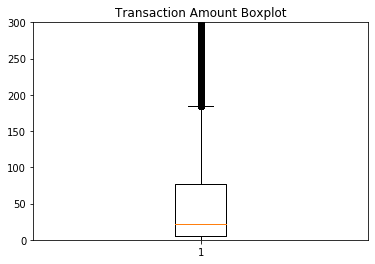

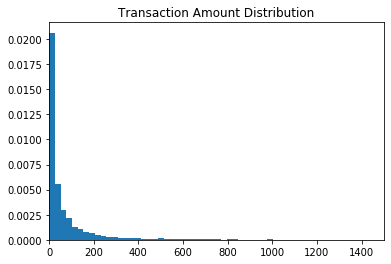

In [10]:
fig1, ax1 = plt.subplots()
ax1.set_title('Transaction Amount Boxplot')
plt.ylim(0, 300)
ax1.boxplot(amount)
fig1, ax2 = plt.subplots()
plt.hist(amount, density=True, bins=1000, label="Data")
ax2.set_title('Transaction Amount Distribution')
plt.xlim(0,1500)
plt.show()

#### Analyse Transaction Time

In [11]:
time = df['Time']

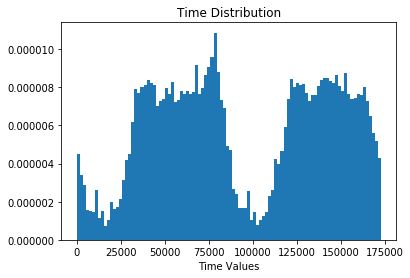

In [12]:
plt.hist(time, density=True, bins=100, label="Data")
plt.title('Time Distribution')
plt.xlabel("Time Values")
plt.show()

#### Fraud vs Non-Fraud

In [17]:
fraud_df = df.loc[df["Class"] == 1]

In [18]:
non_fraud_df = df.loc[df["Class"] == 0]

In [19]:
num_fraud = len(fraud_df)

In [20]:
num_non_fraud = len(non_fraud_df)

In [21]:
fraud_pct = len(fraud_df)/len(non_fraud_df)

In [22]:
print("Number of fraudulent transactions:", num_fraud)
print("Number of valid transactions:", num_non_fraud)
print("Fraud to Non-Fraud Ratio:", fraud_pct)

Number of fraudulent transactions: 492
Number of valid transactions: 284315
Fraud to Non-Fraud Ratio: 0.0017304750013189597


#### Some Pre-processing: Scale non-scaled data

In [13]:
scaler = RobustScaler()

In [14]:
df['amount_scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['time_scaled'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [15]:
df = df.drop(["Amount", "Time"], axis=1)

In [16]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount_scaled,time_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


#### Create blanaced dataset

In [36]:
temp = non_fraud_df.sample(n=num_fraud, random_state=1)

In [37]:
df_balanced = fraud_df[:]

In [38]:
df_balanced = df_balanced.append(temp)

In [39]:
df_balanced = df_balanced.sample(frac=1).reset_index()

In [40]:
len(df_balanced.columns)

32

#### Correlation matrix

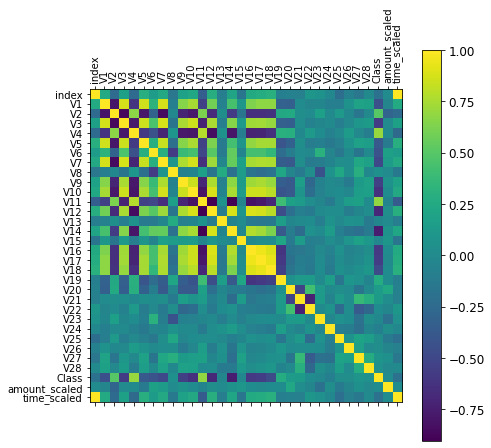

In [44]:
plt.figure(figsize=(7,7))
plt.matshow(df_balanced.corr(), fignum=1)
plt.xticks(range(df_balanced.shape[1]), df_balanced.columns, fontsize=10, rotation=90)
plt.yticks(range(df_balanced.shape[1]), df_balanced.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.show()

### Pre-Processing

#### Train-Test Split

In [45]:
X = df.drop('Class', axis=1).copy()

In [46]:
y = df['Class'].copy()

In [47]:
sum(y)/len(X)

0.001727485630620034

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y) 

In [49]:
sum(y_train)/len(X_train)

0.0017274876524425926

In [50]:
sum(y_test)/len(X_test)

0.0017274795651807534

### Models

#### XGBoost

In [51]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42)

In [52]:
clf_xgb.fit(
    X_train,
    y_train,
    verbose=True,
    early_stopping_rounds=10,
    eval_metric='auc',
    eval_set=[(X_test, y_test)]
)

[0]	validation_0-auc:0.914373
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.914373
[2]	validation_0-auc:0.914402
[3]	validation_0-auc:0.914405
[4]	validation_0-auc:0.914404
[5]	validation_0-auc:0.914404
[6]	validation_0-auc:0.918464
[7]	validation_0-auc:0.918478
[8]	validation_0-auc:0.92251
[9]	validation_0-auc:0.922513
[10]	validation_0-auc:0.922548
[11]	validation_0-auc:0.922548
[12]	validation_0-auc:0.922546
[13]	validation_0-auc:0.922543
[14]	validation_0-auc:0.922546
[15]	validation_0-auc:0.922551
[16]	validation_0-auc:0.922553
[17]	validation_0-auc:0.92256
[18]	validation_0-auc:0.922561
[19]	validation_0-auc:0.922557
[20]	validation_0-auc:0.92256
[21]	validation_0-auc:0.922556
[22]	validation_0-auc:0.922532
[23]	validation_0-auc:0.92252
[24]	validation_0-auc:0.922549
[25]	validation_0-auc:0.922531
[26]	validation_0-auc:0.92252
[27]	validation_0-auc:0.922514
[28]	validation_0-auc:0.922462
Stopping. Best iteration:
[18]	validation_0-auc:0.92

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

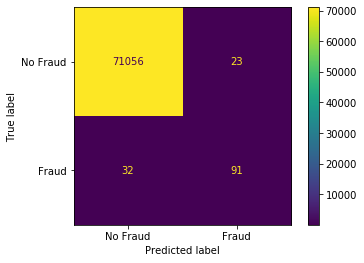

In [53]:
plot_confusion_matrix(
    clf_xgb,
    X_test,
    y_test,
    values_format='d',
    display_labels=["No Fraud", "Fraud"]
)

In [54]:
clf_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

In [79]:
roc_auc_score(y_test, y_pred_xgb)

0.869756907377878

#### Random Forest

In [80]:
clf_rf = RandomForestClassifier(
    random_state=42,
    criterion='gini',
    n_estimators=100,
    verbose=False)

In [81]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42,
                       verbose=False, warm_start=False)

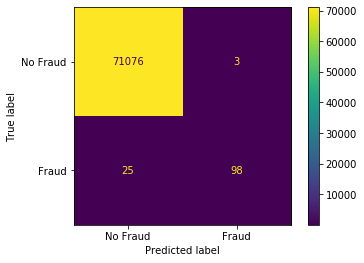

In [82]:
plot_confusion_matrix(
    clf_rf,
    X_test,
    y_test,
    values_format='d',
    display_labels=["No Fraud", "Fraud"]
)

In [86]:
y_pred_rf = clf_rf.predict(X_test)

In [87]:
roc_auc_score(y_test, y_pred_rf)

0.8983528804603877

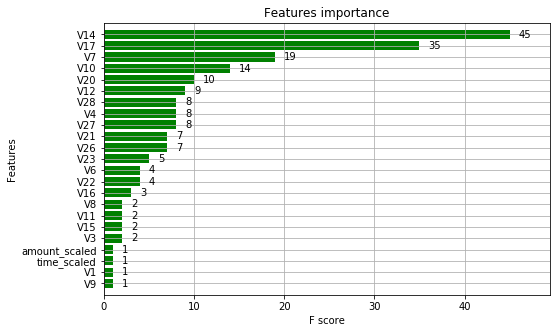

In [143]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(clf_xgb, height=0.8, title="Features importance", ax=ax, color="green") 
plt.show()

#### Logistic Regression

In [111]:
clf_log = LogisticRegression(random_state=0, max_iter=200)

In [112]:
clf_log.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

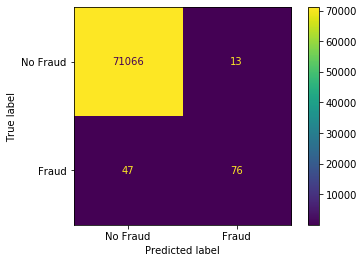

In [116]:
plot_confusion_matrix(
    clf_log,
    X_test,
    y_test,
    values_format='d',
    display_labels=["No Fraud", "Fraud"]
)

In [118]:
y_pred_log = clf_log.predict(X_test)

In [119]:
roc_auc_score(y_test, y_pred_log)

0.8088516418866126

### Model Comparison: ROC-AUC Graph

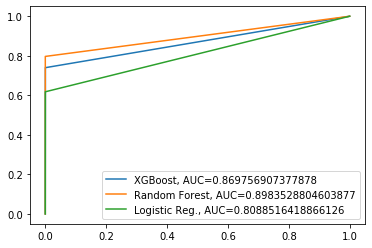

In [156]:
plt.figure(0).clf()

fpr, tpr, thresh = roc_curve(y_test, y_pred_xgb)
auc = roc_auc_score(y_test, y_pred_xgb)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

fpr, tpr, thresh = roc_curve(y_test, y_pred_rf)
auc = roc_auc_score(y_test, y_pred_rf)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

fpr, tpr, thresh = roc_curve(y_test, y_pred_log)
auc = roc_auc_score(y_test, y_pred_log)
plt.plot(fpr,tpr,label="Logistic Reg., AUC="+str(auc))

plt.legend(loc=0)

# Split Dataset

## 50:50 Split

In [436]:
nfraud1 = non_fraud_df[:int(len(non_fraud_df)/2)]
nfraud2 = non_fraud_df[int(len(non_fraud_df)/2):]

In [437]:
fraud1 = fraud_df[:int(len(fraud_df)/2)]
fraud2 = fraud_df[int(len(fraud_df)/2):]

In [438]:
df_half1 = nfraud1.append(fraud1)
df_half1 = df_half1.sample(frac=1).reset_index()

In [439]:
df_half2 = nfraud2.append(fraud2)
df_half2 = df_half2.sample(frac=1).reset_index()

### Train-Test Split

##### df_half1

In [440]:
X_half1 = df_half1.drop('Class', axis=1).copy()
y_half1 = df_half1['Class'].copy()
sum(y1)/len(X1)

0.0017274876524425926

In [479]:
X_half1_train, X_half1_test, y_half1_train, y_half1_test = train_test_split(X_half1, y_half1, random_state=0, stratify=y_half1) 
sum(y_half1_train)/len(X_half1_train)

0.001722814179509747

##### df_half2

In [492]:
X_half2 = df_half2.drop('Class', axis=1).copy()
y_half2 = df_half2['Class'].copy()
sum(y1)/len(X1)

X_half2_train, X_half2_test, y_half2_train, y_half2_test = train_test_split(X_half2, y_half2, random_state=0, stratify=y_half2) 
sum(y_half2_train)/len(X_half2_train)

0.0017321610816175576

### Random Forest

##### df_half1

Model Run

In [526]:
clf_rf = RandomForestClassifier(
    random_state=0,
    n_jobs=4,
    criterion='gini',
    n_estimators=100,
    verbose=False)

In [527]:
clf_rf.fit(X_half1_train, y_half1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=0, verbose=False,
                       warm_start=False)

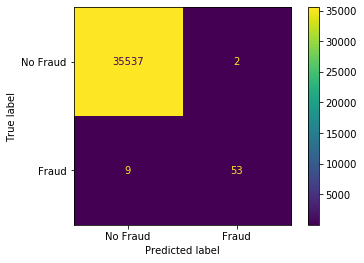

In [528]:
plot_confusion_matrix(
    clf_rf,
    X_half1_test,
    y_half1_test,
    values_format='d',
    display_labels=["No Fraud", "Fraud"]
)

In [534]:
y_half1_pred_rf = clf_rf.predict(X_half1_test)

In [535]:
roc_auc_score(y_half1_test, y_half1_pred_rf)

0.9273912167369062

##### df_half2

In [536]:
clf_rf.fit(X_half2_train, y_half2_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=0, verbose=False,
                       warm_start=False)

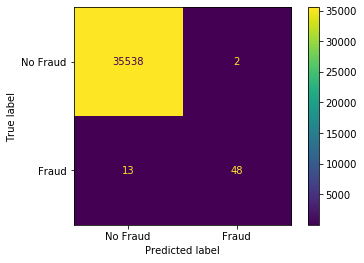

In [537]:
plot_confusion_matrix(
    clf_rf,
    X_half2_test,
    y_half2_test,
    values_format='d',
    display_labels=["No Fraud", "Fraud"]
)

In [540]:
y_half2_pred_rf = clf_rf.predict(X_half2_test)

In [542]:
roc_auc_score(y_half2_test, y_half2_pred_rf)

0.8934144856407465

## 1:3 Split

In [674]:
step = int(len(non_fraud_df)*3/4)

In [675]:
nfraud1 = non_fraud_df[:step]
nfraud2 = non_fraud_df[step:]

In [676]:
step = int(len(fraud_df)*3/4)

In [677]:
fraud1 = fraud_df[:step]
fraud2 = fraud_df[step:]

In [678]:
df_3_4 = nfraud1.append(fraud1)
df_3_4 = df_3_4.sample(frac=1).reset_index()

In [679]:
df_1_4 = nfraud2.append(fraud2)
df_1_4 = df_1_4.sample(frac=1).reset_index()

In [680]:
len(df_3_4)

213605

In [681]:
len(df_1_4)

71202

### Train-Test Split

##### df 3/4

In [682]:
X_3_4 = df_3_4.drop('Class', axis=1).copy()
y_3_4 = df_3_4['Class'].copy()
sum(y_3_4)/len(X_3_4)

0.0017274876524425926

In [683]:
X_3_4_train, X_3_4_test, y_3_4_train, y_3_4_test = train_test_split(X_3_4, y_3_4, random_state=5, stratify=y_3_4) 
sum(y_3_4_train)/len(X_3_4_train)

0.0017290562598702896

In [684]:
len(X_3_4_train)

160203

In [685]:
len(X_3_4_test)

53402

##### df 1/4

In [686]:
X_1_4 = df_1_4.drop('Class', axis=1).copy()
y_1_4 = df_1_4['Class'].copy()
sum(y_1_4)/len(X_1_4)

0.0017274795651807534

In [687]:
X_1_4_train, X_1_4_test, y_1_4_train, y_1_4_test = train_test_split(X_1_4, y_1_4, random_state=5, stratify=y_1_4) 
sum(y_1_4_train)/len(X_1_4_train)

0.001722814179509747

In [688]:
len(X_1_4_train)

53401

In [689]:
len(X_1_4_test)

17801

### Random Forest

##### df 3/4

Model Run

In [690]:
clf_rf.fit(X_3_4_train, y_3_4_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=0, verbose=False,
                       warm_start=False)

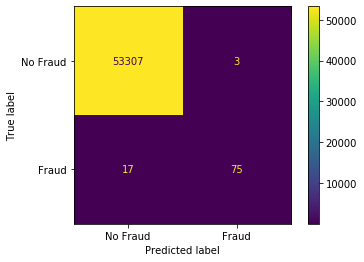

In [691]:
plot_confusion_matrix(
    clf_rf,
    X_3_4_test,
    y_3_4_test,
    values_format='d',
    display_labels=["No Fraud", "Fraud"]
)

In [692]:
y_3_4_pred_rf = clf_rf.predict(X_3_4_test)

In [693]:
roc_auc_score(y_3_4_test, y_3_4_pred_rf)

0.9075805583421006

#### df 1/4

Model Run

In [764]:
len(X_1_4_train)

53401

In [766]:
len(X_1_4_test)

17801

In [731]:
clf_rf.fit(X_1_4_train, y_1_4_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=0, verbose=False,
                       warm_start=False)

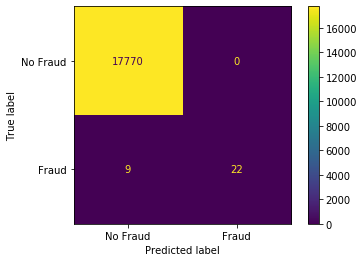

In [732]:
plot_confusion_matrix(
    clf_rf,
    X_1_4_test,
    y_1_4_test,
    values_format='d',
    display_labels=["No Fraud", "Fraud"]
)

In [733]:
y_1_4_pred_rf = clf_rf.predict(X_1_4_test)

In [734]:
roc_auc_score(y_1_4_test, y_1_4_pred_rf)

0.8548387096774194

## Mix Train Data of df_1/4 and df_3/4

In [746]:
len(df)*0.25*0.25

17800.4375

In [747]:
0.25*0.25

0.0625

In [750]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X, y, random_state=42, test_size=0.0625, stratify=y) 

In [751]:
len(X_train_sm)

267006

In [752]:
len(X_test_sm)

17801

In [755]:
sum(y_train_sm)/len(X_train_sm)

0.0017265529613566736

In [756]:
sum(y_test_sm)/len(X_test_sm)

0.001741475198022583

In [757]:
clf_rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=0, verbose=False,
                       warm_start=False)

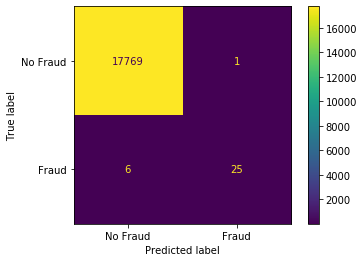

In [758]:
plot_confusion_matrix(
    clf_rf,
    X_test_sm,
    y_test_sm,
    values_format='d',
    display_labels=["No Fraud", "Fraud"]
)

In [759]:
y_sm_pred_rf = clf_rf.predict(X_test_sm)

In [760]:
roc_auc_score(y_test_sm, y_sm_pred_rf)

0.9031976691415398

In [ ]:
plt.figure(0).clf()

fpr, tpr, thresh = roc_curve(y_test, y_pred_xgb)
auc = roc_auc_score(y_test, y_pred_xgb)
plt.plot(fpr,tpr,label="50-50: df1, AUC="+str(auc))

fpr, tpr, thresh = roc_curve(y_test, y_pred_rf)
auc = roc_auc_score(y_test, y_pred_rf)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

fpr, tpr, thresh = roc_curve(y_test, y_pred_log)
auc = roc_auc_score(y_test, y_pred_log)
plt.plot(fpr,tpr,label="Logistic Reg., AUC="+str(auc))

plt.legend(loc=0)

## Higher Fraud Percentage

In [735]:
df_1_4_fr = nfraud2.append(fraud_df)
df_1_4_fr = df_1_4_fr.sample(frac=1).reset_index()

In [762]:
len(df_1_4_fr)

71571

In [736]:
X_1_4_fr = df_1_4_fr.drop('Class', axis=1).copy()
y_1_4_fr = df_1_4_fr['Class'].copy()
sum(y_1_4_fr)/len(X_1_4_fr)

0.006874292660435093

In [737]:
X_1_4_fr_train, X_1_4_fr_test, y_1_4_fr_train, y_1_4_fr_test = train_test_split(X_1_4_fr, y_1_4_fr, random_state=5, stratify=y_1_4_fr) 
sum(y_1_4_fr_train)/len(X_1_4_fr_train)

0.006874324676776333

In [738]:
clf_rf.fit(X_1_4_fr_train, y_1_4_fr_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=0, verbose=False,
                       warm_start=False)

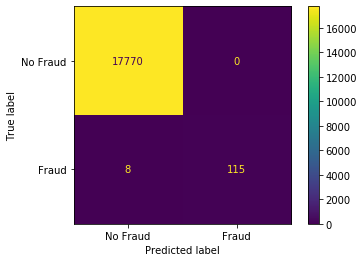

In [739]:
plot_confusion_matrix(
    clf_rf,
    X_1_4_fr_test,
    y_1_4_fr_test,
    values_format='d',
    display_labels=["No Fraud", "Fraud"]
)

In [740]:
y_1_4_fr_pred_rf = clf_rf.predict(X_1_4_fr_test)

In [741]:
roc_auc_score(y_1_4_fr_test, y_1_4_fr_pred_rf)

0.967479674796748